In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
from datetime import datetime
from scipy.stats import multivariate_normal

cdata = pd.read_csv('owid-covid-data.csv')

In [2]:
cdata.shape

(293500, 67)

In [3]:
cdata.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

–ë–µ—Ä–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –†–æ—Å—Å–∏–∏ —Å 3 –º–∞—Ä—Ç–∞

In [5]:
cdata_rus = cdata[(cdata['location'] == 'Russia')&(cdata['date'] >= '2020-03-03')]
cdata_rus.head()

iso_code continent location        date  total_cases  new_cases  \
214839      RUS    Europe   Russia  2020-03-03          3.0        1.0   
214840      RUS    Europe   Russia  2020-03-04          3.0        0.0   
214841      RUS    Europe   Russia  2020-03-05          3.0        0.0   
214842      RUS    Europe   Russia  2020-03-06          4.0        1.0   
214843      RUS    Europe   Russia  2020-03-07          4.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
214839               0.143           NaN         0.0                  0.0   
214840               0.143           NaN         0.0                  0.0   
214841               0.143           NaN         0.0                  0.0   
214842               0.286           NaN         0.0                  0.0   
214843               0.286           NaN         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
214839  ...          58.3                     NaN                        8.05   
214840  ...          58.3                     NaN                        8.05   
214841  ...          58.3                     NaN                        8.05   
214842  ...          58.3                     NaN                        8.05   
214843  ...          58.3                     NaN                        8.05   

        life_expectancy  human_development_index   population  \
214839            72.58                    0.824  144713312.0   
214840            72.58                    0.824  144713312.0   
214841            72.58                    0.824  144713312.0   
214842            72.58                    0.824  144713312.0   
214843            72.58                    0.824  144713312.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
214839                                   NaN                          NaN   
214840                                   NaN                          NaN   
214841                                   NaN                          NaN   
214842                                   NaN                          NaN   
214843                                   NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  
214839               NaN                                      NaN  
214840               NaN                                      NaN  
214841               NaN                                      NaN  
214842               NaN                                      NaN  
214843               NaN                                      NaN  

[5 rows x 67 columns]

In [49]:
cdata_rus.shape

(1102, 67)

In [50]:
cdata_rus.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

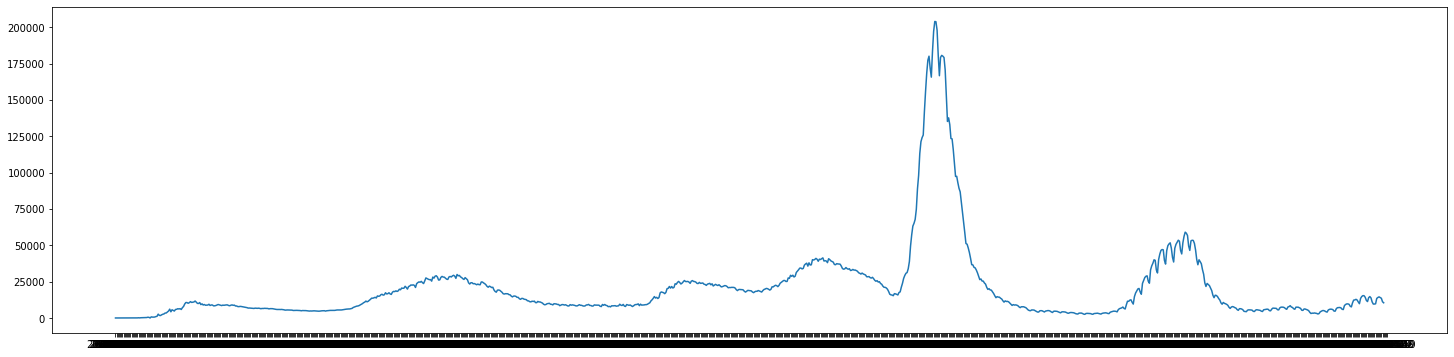

In [42]:
plt.figure(figsize=(25,6))
plt.plot(cdata_rus['date'], cdata_rus['new_cases'])


–ì—Ä–∞—Ñ–∏–∫ —Ä–æ—Å—Ç–∞ –∑–∞–±–æ–ª–µ–≤–∞–µ–º–æ—Å—Ç–∏ –≤ –†–æ—Å—Å–∏–∏ –ø–æ –¥–Ω—è–º —Å –Ω–∞—á–∞–ª–∞ —ç–ø–∏–¥–µ–º–∏–∏

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

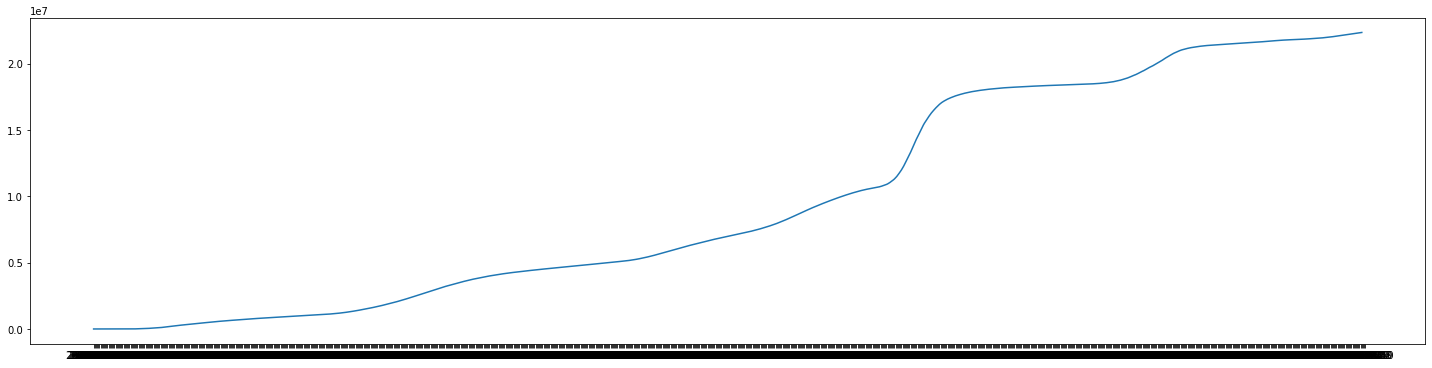

In [43]:
plt.figure(figsize=(25,6))
plt.plot(cdata_rus['date'], cdata_rus['total_cases'])


–ù–∞—á–∞–ª–æ —Ä–æ—Å—Ç–∞ –∑–∞–±–æ–ª–µ–≤–∞–µ–º–æ—Å—Ç–∏ –ø–æ—Ö–æ–∂–µ –Ω–∞ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ç—É

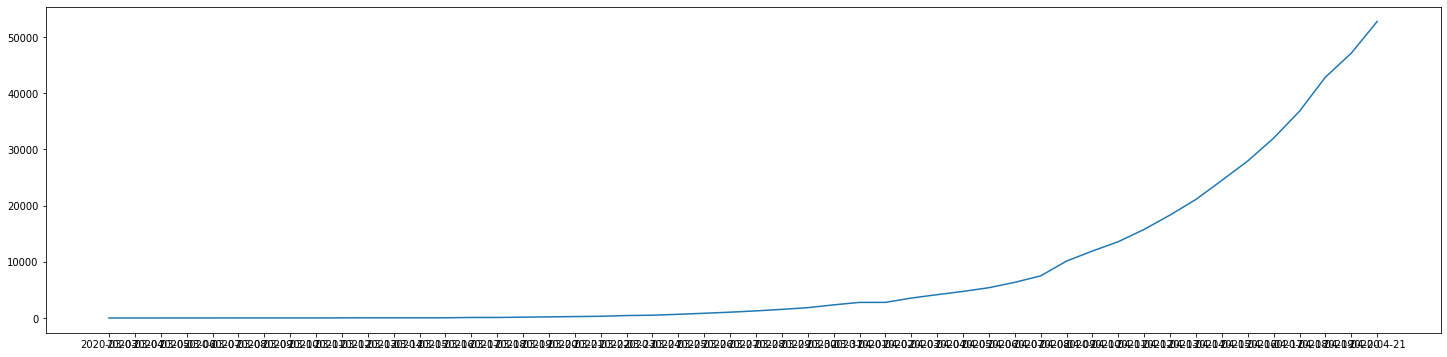

In [47]:
plt.figure(figsize=(25,6))
plt.plot(cdata_rus['date'].head(50), cdata_rus['total_cases'].head(50))


# –ó–∞–¥–∞–Ω–∏–µ 1


–°–º–æ–¥–µ–ª–∏—Ä—É–µ–º —Ä–æ—Å—Ç –∑–∞–±–æ–ª–µ–≤–∞–µ–º–æ—Å—Ç–∏ –∫–æ–≤–∏–¥–æ–º —Å –ø–æ–º–æ—â—å—é –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. 
–î–æ–ø—É—Å—Ç–∏–º, —á—Ç–æ —Ä–æ—Å—Ç  —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–π –æ—Ç –ø–æ—Ä—è–¥–∫–æ–≤–æ–≥–æ –¥–Ω—è x —Å –Ω–∞—á–∞–ª–∞ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è. 

$$
y =  \ e^{Ax} \, 
$$

$$
ln(y) = Ax
$$
–ü–æ–ª—É—á–∏–ª–∏ –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å. –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ 
$$
y = ln(total__cases)
$$
, x - –¥–Ω–µ–π —Å –Ω–∞—á–∞–ª–∞ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è

In [6]:
# –¥–æ–±–∞–≤–ª—è–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–∞–Ω–Ω—ã–µ
cdata_rus['log_target'] = cdata_rus.total_cases.apply(lambda x: np.log(x))
cdata_rus['daily_order'] = cdata_rus.date.apply(lambda x: (datetime.strptime(x, "%Y-%m-%d") - datetime.strptime(cdata_rus['date'].iloc[0], "%Y-%m-%d")).days )


<ipython-input-6-47a0e766494c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata_rus['log_target'] = cdata_rus.total_cases.apply(lambda x: np.log(x))
<ipython-input-6-47a0e766494c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata_rus['daily_order'] = cdata_rus.date.apply(lambda x: (datetime.strptime(x, "%Y-%m-%d") - datetime.strptime(cdata_rus['date'].iloc[0], "%Y-%m-%d")).days )


In [52]:
cdata_rus.tail() 

iso_code continent location        date  total_cases  new_cases  \
215936      RUS    Europe   Russia  2023-03-05   22342128.0    13559.0   
215937      RUS    Europe   Russia  2023-03-06   22353291.0    11163.0   
215938      RUS    Europe   Russia  2023-03-07   22363740.0    10449.0   
215939      RUS    Europe   Russia  2023-03-08          NaN        NaN   
215940      RUS    Europe   Russia  2023-03-09          NaN        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
215936           12713.000      396298.0        43.0               37.571   
215937           12939.143      396336.0        38.0               38.714   
215938           13038.571      396378.0        42.0               39.714   
215939                 NaN           NaN         NaN                  NaN   
215940                 NaN           NaN         NaN                  NaN   

        ...  hospital_beds_per_thousand  life_expectancy  \
215936  ...                        8.05            72.58   
215937  ...                        8.05            72.58   
215938  ...                        8.05            72.58   
215939  ...                        8.05            72.58   
215940  ...                        8.05            72.58   

        human_development_index   population  \
215936                    0.824  144713312.0   
215937                    0.824  144713312.0   
215938                    0.824  144713312.0   
215939                    0.824  144713312.0   
215940                    0.824  144713312.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
215936                                   NaN                          NaN   
215937                                   NaN                          NaN   
215938                                   NaN                          NaN   
215939                                   NaN                          NaN   
215940                                   NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  log_target  \
215936               NaN                                      NaN   16.921985   
215937               NaN                                      NaN   16.922484   
215938               NaN                                      NaN   16.922951   
215939               NaN                                      NaN         NaN   
215940               NaN                                      NaN         NaN   

        daily_order  
215936         1097  
215937         1098  
215938         1099  
215939         1100  
215940         1101  

[5 rows x 69 columns]

In [11]:
train_cdata = cdata_rus[['date', 'total_cases', 'new_cases', 'log_target', 'daily_order']].iloc[:50]
test_cdata = cdata_rus[['date', 'total_cases', 'new_cases', 'log_target', 'daily_order']].iloc[50:]

In [12]:
# –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å 
linreg = LinearRegression()

In [13]:
linreg.fit(train_cdata[['daily_order']], train_cdata.log_target)

LinearRegression()

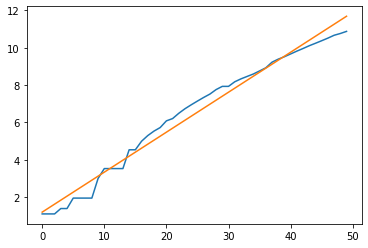

In [43]:

plt.plot(train_cdata.daily_order, train_cdata.log_target)
plt.plot(train_cdata.daily_order, linreg.predict(train_cdata[["daily_order"]])) 

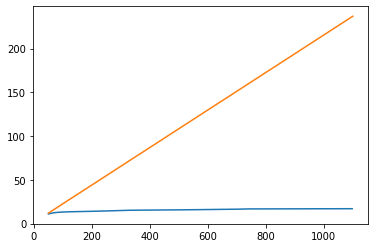

In [57]:
plt.plot(test_cdata.daily_order, test_cdata.log_target)
plt.plot(test_cdata.daily_order, linreg.predict(test_cdata[["daily_order"]]))

–ù–∞–π–¥–µ–º –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —ç—Ç–æ–π –º–æ–¥–µ–ª–∏ –¥–ª—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —à–∏—Ä–æ–∫–æ–≥–æ –∞–ø—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

–û—Ü–µ–Ω–∏–º –¥–∏—Å–ø–µ—Ä—Å–∏—é —à—É–º–∞ e - 
$$
 y = Ax + e
$$

In [14]:
preds = linreg.predict(train_cdata[["daily_order"]])
std_noise = np.std(preds - train_cdata.log_target)
std_noise

0.4498899109116323

In [15]:
# –≤–æ–∑—å–º–µ–º –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–ø—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è 
n = 2
mu = np.zeros(n)
sigma = 100 * np.eye(n)

–¢–æ–≥–¥–∞ –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞—Å—Å—á–∏—Ç–∞–µ–º –ø–æ —Ñ–æ—Ä–º—É–ª–µ
$$
ùëù(w ‚à£ D) = ùëÅ(w ‚à£ {ùúá_ùëÅ}, {Œ£_ùëÅ} )
$$
–≥–¥–µ 
$$
{ùúá_N} = {Œ£_N} ({Œ£_0^{-1}}{ùúá_0} + {\frac{1}{Œ£^2}}{X^‚ä§y}) 
$$

$$
{Œ£_ùëÅ}^{-1} = {Œ£_0^{-1}} + {\frac{1}{Œ£^2}}{X^‚ä§X}
$$

In [16]:
# –æ—Ü–µ–Ω–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è 

def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x_i] for x_i in x])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), y ) )
    return mu_n, sigma_n

In [18]:
cur_mu, cur_sigma = bayesian_update(mu, sigma, train_cdata.daily_order.values, train_cdata.log_target.values, std_noise)
cur_mu.shape, cur_sigma.shape
cur_mu, cur_sigma

(array([1.19323277, 0.21411201]), array([[ 1.57133653e-02, -4.76162561e-04],
        [-4.76162561e-04,  1.94359933e-05]]))

In [229]:
N = 250

X = np.linspace(-1, 1, N)
Y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

In [230]:
# –∞–ø–æ—Å—Ç–µ—Ä–∏–æ–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

(250, 250)


In [232]:
# –ü–æ—Å—ç–º–ø–ª–∏—Ä—É–µ–º –∏ –ø–æ—Ä–∏—Å—É–µ–º –ø—Ä—è–º—ã–µ
def myplot_sample_lines(mu, sigma, n=20, points=None):
    
    my_w = np.random.multivariate_normal(mu, sigma, n)

    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

In [235]:
xs = np.linspace(0, 181, 181)

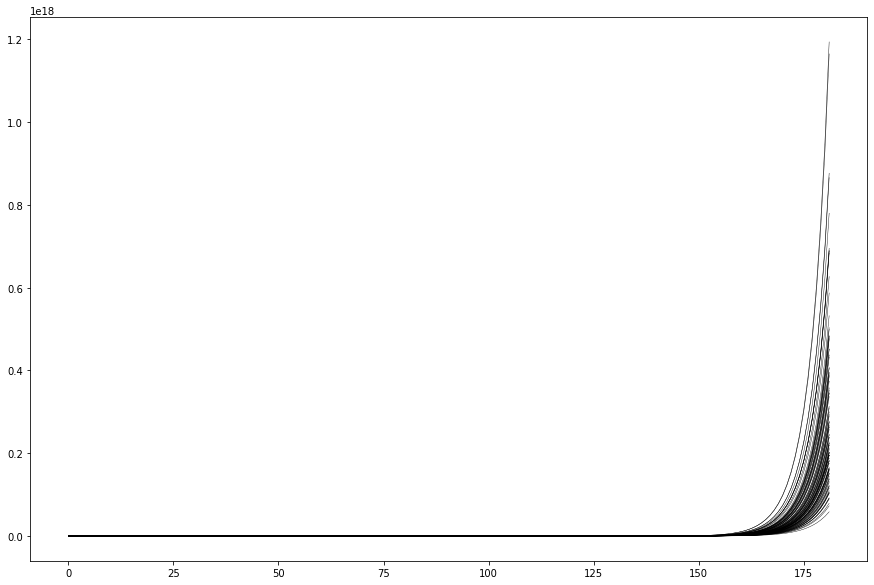

In [236]:
# points = [ cdata_rus[cdata_rus['date'] == '2020-05-01'].daily_order.values, cdata_rus[cdata_rus['date'] == '2020-05-01'].total_cases.values]
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)

myplot_sample_lines(cur_mu, cur_sigma, 100)

# plt.plot(cdata_rus.daily_order.values, cdata_rus.total_cases.values)


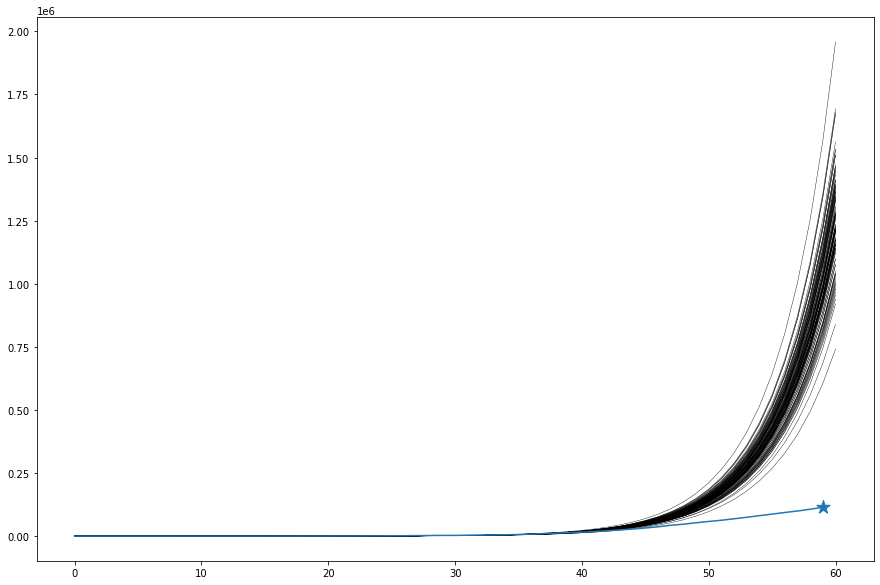

In [233]:
xs = np.linspace(0, 60, 61)
points = [ cdata_rus[cdata_rus['date'] == '2020-05-01'].daily_order.values, cdata_rus[cdata_rus['date'] == '2020-05-01'].total_cases.values
          ]
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)

myplot_sample_lines(cur_mu, cur_sigma, 100,
                    points)
plt.plot(cdata_rus.daily_order.values[:60], cdata_rus.total_cases.values[:60])


–°–∏–Ω–∏–π –≥—Ä–∞—Ñ–∏–∫ —Å–æ –∑–≤–µ–∑–¥–æ–π –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ä–µ–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π –∫ 1 –º–∞—è. –í–∏–¥–Ω–æ —á—Ç–æ –∫—Ä–∏–≤—ã–µ –∏–∑ –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è 

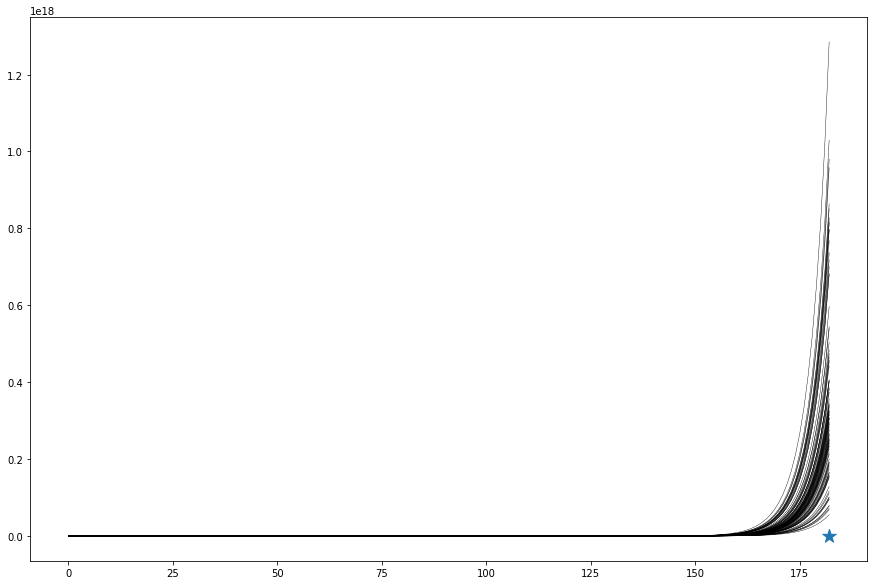

In [237]:
xs = np.linspace(0, 182, 182)
points = [ cdata_rus[cdata_rus['date'] == '2020-09-01'].daily_order.values, cdata_rus[cdata_rus['date'] == '2020-09-01'].total_cases.values
          ]
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)
myplot_sample_lines(cur_mu, cur_sigma, 100,
                    points)

# plt.plot(cdata_rus.daily_order.values[:182], cdata_rus.total_cases.values[:182])


–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ–µ –∫ 1 —Å–µ–Ω—Ç—è–±—Ä—è, –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫—Ä–∞—Ç–Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç —Ä–µ–∞–ª—å–Ω–æ–≥–æ

# –ó–∞–¥–∞–Ω–∏–µ 2

–ï—Å–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–µ–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ —Ä–æ—Å—Ç–∞ –∑–∞–±–æ–ª–µ–≤–∞–µ–º–æ—Å—Ç–∏, —Ç–æ –∫ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–º—É –¥–Ω—é –æ–Ω –≤—ã—Ö–æ–¥–∏—Ç –Ω–∞ –Ω–∞—Å—ã—â–µ–Ω–∏–µ. –¢–æ–≥–¥–∞ –≥—Ä–∞—Ñ–∏–∫ –∏–º–µ–µ—Ç —Å–∏–≥–º–æ–∏–¥–∞–ª—å–Ω—ã–π –≤–∏–¥. –í –∫–∞—á–µ—Å—Ç–≤–µ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π —Ñ–æ—Ä–º—ã —Ç–∞–∫–æ–π —Å–∏–≥–º–æ–∏–¥—ã –≤–æ–∑—å–º—ë–º —Ñ–æ—Ä–º—É —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è –≥–∞—É—Å—Å–∏–∞–Ω–∞: 
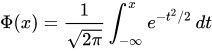

–°–≤–µ–¥–µ–º —Ä–µ—à–µ–Ω–∏–µ —Å–∏–≥–º–æ–∏–¥–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –∫ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. 
$$
y(x) =  \int_{-\infty}^{x} e^{at^2 + bt + c} \,dt = –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã–π \ —Å–ª—É—á–∞–π
= \sum_{0}^{x} e^{at^2 + bt + c} =
 \sum_{0}^{x-1} e^{at^2 + bt + c} + e^{ax^2 + xb + c}
$$

$$
y_N = y_{N-1} + e^{ax_N^2 + x_Nb + c}
$$

 –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ 
 $$
 ln({totalcases}_N - {totalcases}_{N-1}) = ax_N^2 + x_Nb + c => ln(newcases) = AX
 $$
 $$ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º\ –ª–∏–Ω–µ–Ω—É—é\ —Ä–µ–≥—Ä–µ—Å—Å–∏—é\ —É–∂–µ\ —Å \ 2—è \ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ \ - x, x^2
 $$

In [102]:
# –¥–æ–±–∞–≤–ª—è–µ–º –Ω—É–∂–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
cdata_rus['daily_order_sqrt'] = cdata_rus.daily_order.apply(lambda x: np.square(x))
cdata_rus['new_cases'] = cdata_rus.new_cases.apply(lambda x: 1 if x == 0 else x)
cdata_rus['new_cases_log'] = cdata_rus.new_cases.apply(lambda x: (-1)*np.log(x))

<ipython-input-102-f5aa9d39176c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata_rus['daily_order_sqrt'] = cdata_rus.daily_order.apply(lambda x: np.square(x))
<ipython-input-102-f5aa9d39176c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdata_rus['new_cases'] = cdata_rus.new_cases.apply(lambda x: 1 if x == 0 else x)
<ipython-input-102-f5aa9d39176c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [103]:
train_cdata = cdata_rus[['date', 'total_cases', 'new_cases', 'log_target', 'daily_order', 'daily_order_sqrt', 'new_cases_log']].iloc[:50]
test_cdata = cdata_rus[['date', 'total_cases', 'new_cases', 'log_target', 'daily_order', 'daily_order_sqrt', 'new_cases_log']].iloc[50:]

In [104]:
linreg = LinearRegression()

linreg.fit(train_cdata[['daily_order', 'daily_order_sqrt']].values, train_cdata.new_cases_log.values)

LinearRegression()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


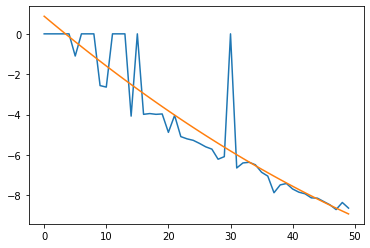

In [105]:
plt.plot(train_cdata.daily_order, train_cdata.new_cases_log)
plt.plot(train_cdata.daily_order, linreg.predict(train_cdata[['daily_order', 'daily_order_sqrt']])) 

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


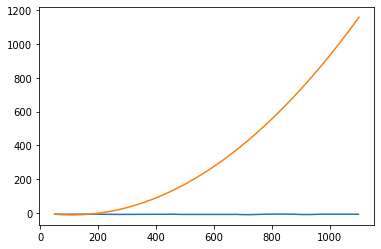

In [106]:
plt.plot(test_cdata.daily_order, test_cdata.new_cases_log)
plt.plot(test_cdata.daily_order, linreg.predict(test_cdata[['daily_order', 'daily_order_sqrt']])) 

In [107]:
linreg = LinearRegression()

linreg.fit(cdata_rus[['daily_order', 'daily_order_sqrt']].values, cdata_rus.new_cases_log.fillna(0).values)

LinearRegression()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


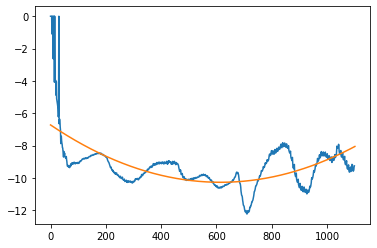

In [108]:
plt.plot(cdata_rus.daily_order, cdata_rus.new_cases_log)
plt.plot(cdata_rus.daily_order, linreg.predict(cdata_rus[['daily_order', 'daily_order_sqrt']]))

In [109]:
preds = linreg.predict(cdata_rus[['daily_order', 'daily_order_sqrt']].values)
var_noise = np.std(preds - cdata_rus.new_cases_log.fillna(0).values)
var_noise

1.2440674966077454

In [110]:
# —Ç–µ–ø–µ—Ä—å —É –Ω–∞—Å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å 3 –ø—Ä–∏–∑–Ω–∞–∫–∞ 
n = 3
mu = np.zeros(n)
sigma = 100 * np.eye(n)

In [111]:
xs = np.linspace(0, 1000, 1001)

In [112]:
# x_data = pd.DataFrame()
# x_data['b'] = np.ones(50)
# x_data['daily_order'] = train_cdata['daily_order'].values
# x_d55ata['daily_order_sqrt']=train_cdata['daily_order_sqrt'].values

x_data = pd.DataFrame()
x_data['b'] = np.ones(cdata_rus.shape[0])
x_data['daily_order'] = cdata_rus['daily_order'].values
x_data['daily_order_sqrt']=cdata_rus['daily_order_sqrt'].values

In [113]:
def bayesian_update(mu, sigma, x_matrix, y, sigma_noise=.25):
    
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), y ) )
    return mu_n, sigma_n

In [114]:
cur_mu, cur_sigma = bayesian_update(mu, sigma, x_data.values, cdata_rus.new_cases_log.fillna(0).values, var_noise)
cur_mu.shape, cur_sigma.shape
cur_mu, cur_sigma

(array([-6.72110248e+00, -1.15409916e-02,  9.38344846e-06]),
 array([[ 1.25926947e-02, -4.57292433e-05,  3.45961895e-08],
        [-4.57292433e-05,  2.21649026e-07, -1.88714432e-10],
        [ 3.45961895e-08, -1.88714432e-10,  1.71405155e-13]]))

In [138]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    
    my_w = np.random.multivariate_normal(mu, sigma, n)

    for w in my_w:
        s0 = 0
        y_total = []
        for i in xs:
            y = np.exp(w[0] + w[1]*i+w[2]*np.square(i))
            y += s0
            y_total.append(y)
            s0 += y
        plt.plot(xs, np.array(y_total), 'k-', lw=.4)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

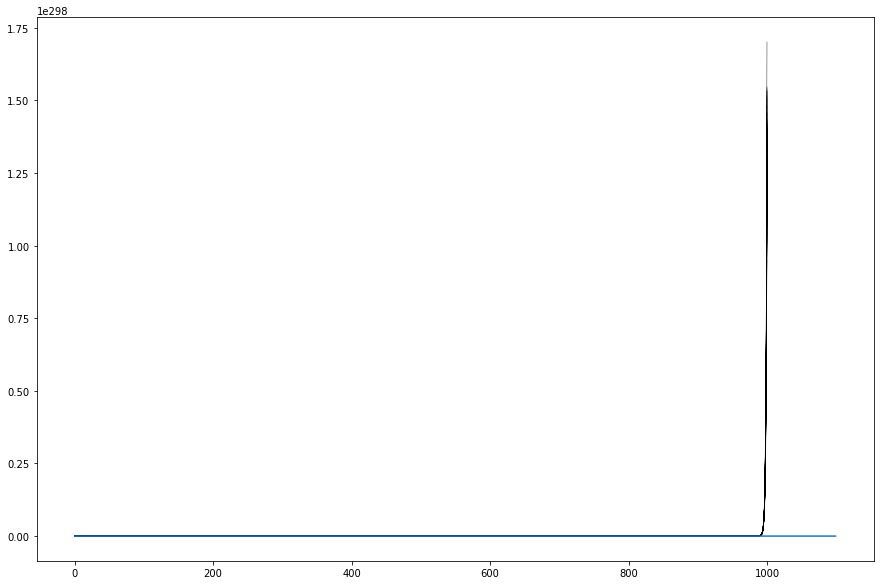

In [139]:
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)

# ax.set_xlim((xs[0], 700))
# ax.set_ylim((0, 20**6))

myplot_sample_lines(cur_mu, cur_sigma, 100)
plt.plot(cdata_rus.daily_order.values, cdata_rus.total_cases.values)

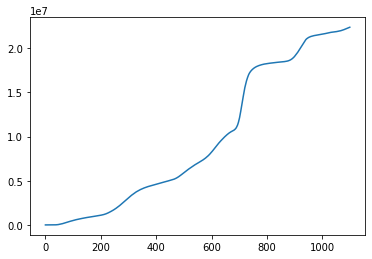

In [97]:
plt.plot(cdata_rus.daily_order.values, cdata_rus.total_cases.values)

In [ ]:
55